In [68]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [69]:
%autoreload 

In [70]:
%load_ext autoreload 
%autoreload 1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [71]:
from santa_2022.original import *
from santa_2022.plotting import *

<AxesSubplot: >

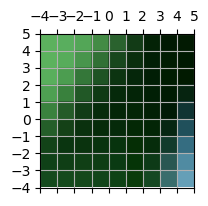

In [11]:
origin = [(64, 0), (-32, 0), (-16, 0), (-8, 0), (-4, 0), (-2, 0), (-1, 0), (-1, 0)]
image = df_to_image(pd.read_csv("../data/image.csv"))
mini_arm = [(2, 0), (-1, 0), (-1, 0)]
mini_image = sliced_image(mini_arm, image)
plot_image(mini_image)

<AxesSubplot: title={'center': 'Neighbors of [(2, 0), (-1, 0), (-1, 0)]'}>

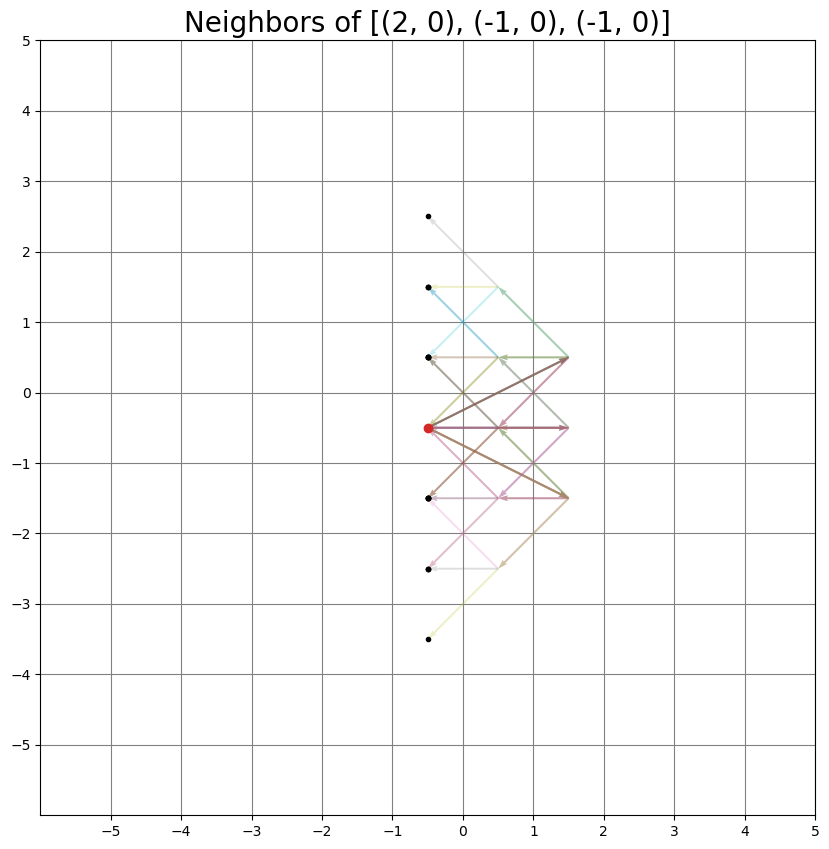

In [6]:
plot_neighbors(mini_arm)

In [7]:
get_reachable_positions(get_neighbors(mini_arm))

{(0, -3), (0, -2), (0, -1), (0, 0), (0, 1), (0, 2), (0, 3)}

In [24]:
sorted(get_neighbors_positions_costs(mini_arm, mini_image), key=lambda x: x[-1])[:5]

[([(2, -1), (-1, 0), (-1, 0)], (0, -1), 1.0941176470588236),
 ([(2, 0), (-1, 0), (-1, -1)], (0, -1), 1.0941176470588236),
 ([(2, 0), (-1, -1), (-1, 0)], (0, -1), 1.0941176470588236),
 ([(2, 0), (-1, 1), (-1, 0)], (0, 1), 1.105882352941176),
 ([(2, 0), (-1, 0), (-1, 1)], (0, 1), 1.105882352941176)]

In [25]:
def cheapest_five(config):
    return sorted(get_neighbors_positions_costs(config, mini_image), key=lambda x: x[-1])[:5]

In [26]:
cheapest_five(mini_arm)

[([(2, -1), (-1, 0), (-1, 0)], (0, -1), 1.0941176470588236),
 ([(2, 0), (-1, 0), (-1, -1)], (0, -1), 1.0941176470588236),
 ([(2, 0), (-1, -1), (-1, 0)], (0, -1), 1.0941176470588236),
 ([(2, 0), (-1, 1), (-1, 0)], (0, 1), 1.105882352941176),
 ([(2, 0), (-1, 0), (-1, 1)], (0, 1), 1.105882352941176)]

In [42]:
for item in cheapest_five(mini_arm)[:3]:
    display(item, cheapest_five(item[0]))

([(2, -1), (-1, 0), (-1, 0)], (0, -1), 1.0941176470588236)

[([(2, -1), (-1, 1), (-1, 0)], (0, 0), 1.0941176470588236),
 ([(2, -1), (-1, 0), (-1, 1)], (0, 0), 1.0941176470588236),
 ([(2, 0), (-1, 0), (-1, 0)], (0, 0), 1.0941176470588236),
 ([(2, -2), (-1, 0), (-1, 0)], (0, -2), 1.1764705882352942),
 ([(2, -1), (-1, 0), (-1, -1)], (0, -2), 1.1764705882352942)]

([(2, 0), (-1, 0), (-1, -1)], (0, -1), 1.0941176470588236)

[([(2, 0), (-1, 1), (-1, -1)], (0, 0), 1.0941176470588236),
 ([(2, 0), (-1, 0), (-1, 0)], (0, 0), 1.0941176470588236),
 ([(2, 0), (-1, 0), (0, -1)], (1, -1), 1.0941176470588236),
 ([(2, 1), (-1, 0), (-1, -1)], (0, 0), 1.0941176470588236),
 ([(2, -1), (-1, 0), (-1, -1)], (0, -2), 1.1764705882352942)]

([(2, 0), (-1, -1), (-1, 0)], (0, -1), 1.0941176470588236)

[([(2, 0), (-1, 0), (-1, 0)], (0, 0), 1.0941176470588236),
 ([(2, 0), (-1, -1), (-1, 1)], (0, 0), 1.0941176470588236),
 ([(2, 0), (0, -1), (-1, 0)], (1, -1), 1.0941176470588236),
 ([(2, 1), (-1, -1), (-1, 0)], (0, 0), 1.0941176470588236),
 ([(2, -1), (-1, -1), (-1, 0)], (0, -2), 1.1764705882352942)]

In [31]:
step_cost([(2, 0), (-1, -1), (-1, 0)], [(2, 0), (0, -1), (-1, 0)], mini_image)

1.0941176470588236

In [76]:
n = mini_arm[0][0] * 2
points = list(product(range(-n, n + 1), repeat=2))
unvisited = set(points)
unvisited.remove((0, 0))
for item in get_all_cheapest_unvisited_neighbors(mini_arm, unvisited, mini_image)[0]:
    display(item, 
            get_position(item),
           get_all_cheapest_unvisited_neighbors(item, unvisited, image))

[(2, -1), (-1, 0), (-1, 0)]

(0, -1)

([[(2, -2), (-1, 0), (-1, 0)],
  [(2, -1), (-1, 0), (-1, -1)],
  [(2, -1), (-1, -1), (-1, 0)]],
 1.1764705882352942)

[(2, 0), (-1, 0), (-1, -1)]

(0, -1)

([[(2, 0), (-1, 0), (0, -1)]], 1.0941176470588236)

[(2, 0), (-1, -1), (-1, 0)]

(0, -1)

([[(2, 0), (0, -1), (-1, 0)]], 1.0941176470588236)

In [60]:
[(2, -1), (-1, 0), (-1, 0)] in get_unvisited_neighbors([(2, -1), (-1, 0), (-1, 0)], unvisited)

False

In [10]:
min(get_neighbors_positions_costs(mini_arm, mini_image), key=lambda x: x[-1])

([(2, -1), (-1, 0), (-1, 0)], (0, -1), 1.0941176470588236)

In [15]:
pd.DataFrame(sorted(get_neighbors_positions_costs(origin, image), key=lambda x: x[-1])[:10])

,0,1,2
0,"[(64, -1), (-32, 0), (-16, 0), (-8, 0), (-4, 0...","(0, -1)",1.094118
1,"[(64, 0), (-32, 0), (-16, 0), (-8, 0), (-4, 0)...","(0, -1)",1.094118
2,"[(64, 0), (-32, 0), (-16, 0), (-8, 0), (-4, 0)...","(0, -1)",1.094118
3,"[(64, 0), (-32, 0), (-16, 0), (-8, 0), (-4, 0)...","(0, -1)",1.094118
4,"[(64, 0), (-32, 0), (-16, 0), (-8, 0), (-4, -1...","(0, -1)",1.094118
5,"[(64, 0), (-32, 0), (-16, 0), (-8, -1), (-4, 0...","(0, -1)",1.094118
6,"[(64, 0), (-32, 0), (-16, -1), (-8, 0), (-4, 0...","(0, -1)",1.094118
7,"[(64, 0), (-32, -1), (-16, 0), (-8, 0), (-4, 0...","(0, -1)",1.094118
8,"[(64, 0), (-32, 1), (-16, 0), (-8, 0), (-4, 0)...","(0, 1)",1.105882
9,"[(64, 0), (-32, 0), (-16, 1), (-8, 0), (-4, 0)...","(0, 1)",1.105882
